## Multivariate Time Series Analysis


In [1]:
from IPython.display import display, Markdown
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
plt.style.use('ggplot')

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

### Import Data



In [3]:
dic_country = \
{'AUS': 'Australia',
 'BRA': 'Brazil',
 'CAN': 'India',
 'CHN': 'China',
 'GBR': 'United Kingdom',
 'IND': 'India',
 'JPN': 'Japan',
 'SGP': 'Singapore',
 'USA': 'United States'}
pd.DataFrame(dic_country,index=[0]).T.reset_index().rename(columns = {'index': 'country_code', 0: 'country_name'})

,country_code,country_name
0,AUS,Australia
1,BRA,Brazil
2,CAN,India
3,CHN,China
4,GBR,United Kingdom
5,IND,India
6,JPN,Japan
7,SGP,Singapore
8,USA,United States


In [4]:
Data_dic_m = pd.ExcelFile('Manufacturing_filled.xlsx')
Data_dic_s = pd.ExcelFile('Service_filled.xlsx')

In [5]:
m_dfs = {}
s_dfs = {}
for con in dic_country.keys():
    m_dfs[(con,'Rolling statistics')] = pd.read_excel(Data_dic_m, sheet_name=con)
    m_dfs[(con,'Rolling statistics')]['Year'] = m_dfs[(con,'Rolling statistics')]['Year'].astype('int')
    m_dfs[(con,'Rolling statistics')] = m_dfs[(con,'Rolling statistics')].set_index('Year')
    s_dfs[(con,'Rolling statistics')] = pd.read_excel(Data_dic_s, sheet_name=con)
    s_dfs[(con,'Rolling statistics')]['Year'] = s_dfs[(con,'Rolling statistics')]['Year'].astype('int')
    s_dfs[(con,'Rolling statistics')] = s_dfs[(con,'Rolling statistics')].set_index('Year')
pd.DataFrame(dic_country,index=[0]).T.reset_index().rename(columns = {'index': 'country_code', 0: 'country_name'})

,country_code,country_name
0,AUS,Australia
1,BRA,Brazil
2,CAN,India
3,CHN,China
4,GBR,United Kingdom
5,IND,India
6,JPN,Japan
7,SGP,Singapore
8,USA,United States


In [6]:
# way to retrieve method and country
method = ['Rolling statistics']
country = list(dic_country.keys())

m_dfs[(country[0],method[0])] # stands for AUS rolling data

,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Industry_value_added_current_USD,GDP_per_capita_current_USD,Final_consumption,New_business_density,Employment_in_industry_%_of_total_employment,Manufacturing_value added_%_of_GDP
Year,,,,,,,,,,,,,,,,,
1990,31.289384,7.851230,1.608281,3276.411907,66.851833,2.221353,2.716689,-3.259470e+09,1222.300049,1.222365e+06,85891.747257,8.961370e+10,18243.471418,2.255137e+11,2.550397,23.128103,13.793444
1991,31.709999,8.289863,1.627674,3289.587924,66.860327,2.249847,0.801486,9.560623e+08,1222.599976,1.454408e+06,89952.363925,9.012950e+10,18855.761996,2.458261e+11,2.994814,23.510000,12.569810
1992,31.709999,8.728495,1.647067,3302.763942,66.781131,2.277313,1.518343,-5.959716e+08,1361.500000,1.686452e+06,94012.980594,8.745366e+10,18604.188270,2.539214e+11,3.439231,23.290001,12.580159
1993,31.670000,9.167128,1.666460,3315.939959,66.662599,2.299702,1.702015,-1.312259e+09,1525.800049,1.918496e+06,98073.597262,8.372119e+10,17667.187100,2.409823e+11,3.883648,23.299999,12.873184
1994,31.719999,9.605760,1.685853,3329.115977,66.582205,2.324174,1.381160,-4.713416e+09,1645.500000,2.150539e+06,102134.213931,8.644760e+10,18079.380179,2.456195e+11,4.328065,23.170000,13.205020
1995,31.219999,10.044393,1.705246,3342.291994,66.572593,2.352420,3.606498,-5.240428e+09,1737.500000,2.382583e+06,106195.000000,9.723938e+10,20358.333356,2.794402e+11,4.772482,22.629999,13.123677
1996,30.610001,10.483025,1.663230,3355.864990,66.555719,2.383531,1.137889,-5.332674e+08,1833.699951,2.614627e+06,110255.000000,1.041882e+11,21904.294118,3.034181e+11,5.216899,22.129999,12.742416
1997,30.320000,10.921658,1.744032,3368.644029,66.598197,2.410346,1.857942,1.646369e+09,1953.800049,2.846671e+06,119619.000000,1.097684e+11,23509.423468,3.258452e+11,5.661316,21.850000,12.303665
1998,30.129999,11.360290,1.514530,3382.171875,66.676387,2.435599,1.902235,-6.467570e+09,1904.400024,3.078714e+06,125587.000000,1.013654e+11,21345.970987,3.004165e+11,6.105733,21.510000,12.470748


### Time Series Visualization

In [7]:
# can change the argument to plot different country and type
def plot_time_series(df, var_num):
  fig, axes = plt.subplots(var_num//4 + 1,4, dpi=120, figsize=(10,6))
  for i, ax in enumerate(axes.flatten()):
      if (i >= var_num - 1): break
      data = df[df.columns[i]]
      ax.plot(data, color = "lightblue",ms = 1)
      # Decorations
      ax.set_title(df.columns[i+1],fontsize=5)
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=4)

  plt.tight_layout()
  plt.show()

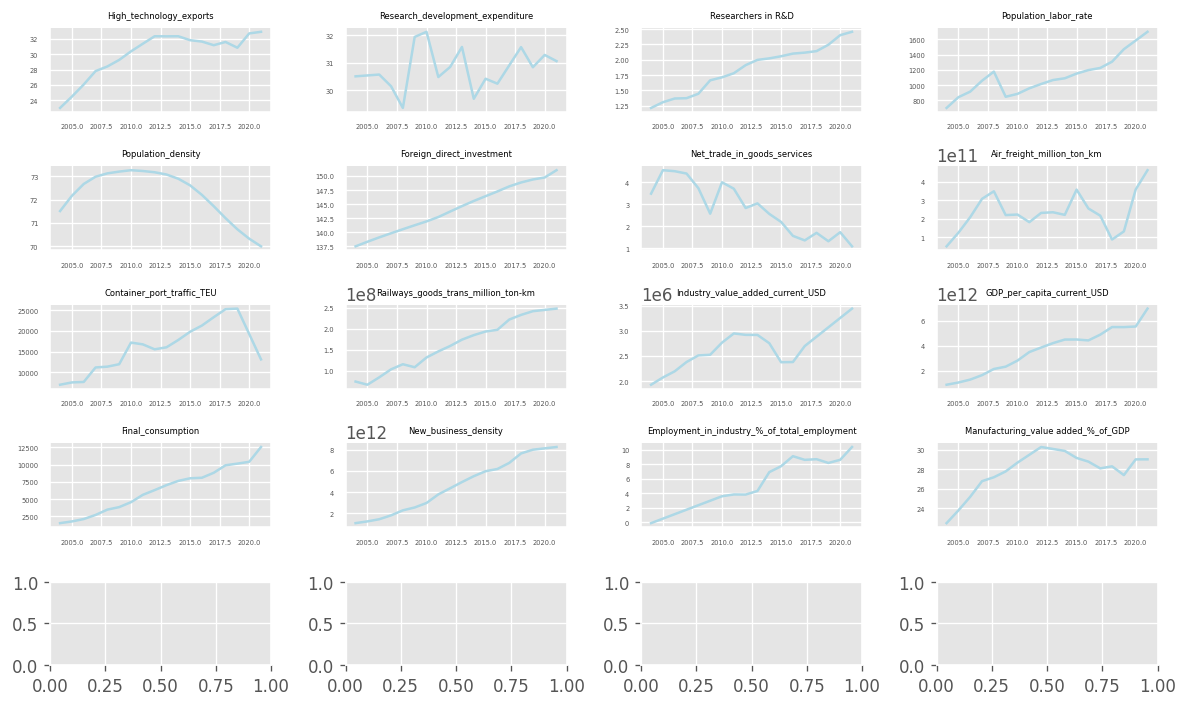

In [ ]:
plot_time_series(m_dfs[('CHN',method[0])],len(m_dfs[('CHN',method[0])].columns))

### Granger-Causality Test

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
def gc_matrix(data, con,m,target, test = 'ssr_chi2test',maxlag =1, verbose = False):
  df = data[(con,m)]
  metrics = pd.DataFrame(np.zeros((1,len(df.columns))),columns = df.columns, index = [target])
  for col in df:
    # print(f"{col}")
    try:
      test_result = grangercausalitytests(df[[col,target]], maxlag = maxlag, verbose = False)
    except Exception as e:
      metrics.loc[target, col] = -1
      if target == 'Manufacturing_value added_%_of_GDP':
        print(f"Manufature {con} {m} {col} contains constant value, cannot perfrom granger-causality test.")
      else:
        print(f"Service {con} {m} {col} contains constant value, cannot perfrom granger-causality test.")
      continue
    p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
    # if verbose: print(f'Y = {target}, X = {col}, P Values = {p_values}')
    min_p_value = np.min(p_values)
    metrics.loc[target, col] = min_p_value
  return metrics

gc_m = {}
gc_s = {}

for con in country:
  for m in method:
    # print(f'=======Manufacture=======')
    res = gc_matrix(m_dfs, con, m, 'Manufacturing_value added_%_of_GDP',verbose = True)
    gc_m[(con,m)] = res

    # print(f'=======Service=======')
    res = gc_matrix(s_dfs, con, m, 'Services_value_added_%_of_GDP',verbose = True)
    gc_s[(con,m)] = res
  print("\n")

Service AUS Rolling statistics Access_electricity contains constant value, cannot perfrom granger-causality test.




Service CAN Rolling statistics Access_electricity contains constant value, cannot perfrom granger-causality test.
Service CAN Rolling statistics New_business_density contains constant value, cannot perfrom granger-causality test.




Service GBR Rolling statistics Access_electricity contains constant value, cannot perfrom granger-causality test.


Service IND Rolling statistics Educational_attainment contains constant value, cannot perfrom granger-causality test.


Service JPN Rolling statistics Access_electricity contains constant value, cannot perfrom granger-causality test.


Service SGP Rolling statistics Access_electricity contains constant value, cannot perfrom granger-causality test.


Service USA Rolling statistics Access_electricity contains constant value, cannot perfrom granger-causality test.




In [9]:
def drop_non_cause(data,matrix, con, m,pvalue = 0.05):
  df = data[(con,m)]
  gc = matrix[(con,m)]
  for col in df.columns:
    if gc[col][0] == 1.0:
      continue
    elif gc[col][0] < 0:
      df = df.drop([col], axis = 1)
    elif gc[col][0] > pvalue:
      df = df.drop([col], axis = 1)
  return df

In [10]:
for con in country:
  for m in method:
    m_dfs[(con,m)] = drop_non_cause(m_dfs, gc_m, con, m)
    s_dfs[(con,m)] = drop_non_cause(s_dfs, gc_s, con, m)

### Correlation checking

In [11]:
from scipy.stats import pearsonr

In [12]:
for con in country:
  for m in method:
    df = m_dfs[(con,m)]
    print(f"=======manufacture {con} {m}=======")
    for col in df:
      corr, _ = pearsonr(df[col], df['Manufacturing_value added_%_of_GDP'])
      print(f'{col} and target: {corr}')
    print("\n")

=======manufacture AUS Rolling statistics=======
High_technology_exports and target: -0.9724191792858934
Research_development_expenditure and target: -0.7420030143704719
Researchers in R&D and target: -0.9837607591563917
Population_labor_rate and target: 0.48029414231021084
Population_density and target: -0.986037631845129
Foreign_direct_investment and target: -0.3193960495780204
Air_freight_million_ton_km and target: -0.22457237938624428
Railways_goods_trans_million_ton-km and target: -0.9645023197917539
New_business_density and target: -0.9744819988085722
Manufacturing_value added_%_of_GDP and target: 1.0


=======manufacture BRA Rolling statistics=======
Population_labor_rate and target: -0.9111233353222035
Foreign_direct_investment and target: -0.7971016952255784
Container_port_traffic_TEU and target: -0.5698174959517538
New_business_density and target: 0.8569511379949096
Manufacturing_value added_%_of_GDP and target: 0.9999999999999998


=======manufacture CAN Rolling statistics==

### Stationarity

In [13]:
def adfuller_simple(series, name,signif=0.05):
  r = adfuller(series, autolag='AIC')
  output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
  p_value = output['pvalue'] 
  if p_value <= signif: 
    print(f"{name}: TRUE")
    return True
  else:
    print(f"{name}: FALSE")
    return False

In [14]:
def adf_testing(df,con,is_manu):
  if is_manu:
    print(f"=======Manufacture {con}=======")
  else:
    print(f"=======Service {con}=======")
  for name, column in df.iteritems():
    adfuller_simple(column, name=column.name)

In [15]:
for m in method:
  print(f"=======Imputation using {m}=======")
  for con in country:
    adf_testing(m_dfs[(con,m)],con,True)
    print("\n")
    adf_testing(s_dfs[(con,m)],con,False)
    print("\n")

=======Imputation using Rolling statistics=======
=======Manufacture AUS=======
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Air_freight_million_ton_km: FALSE
Railways_goods_trans_million_ton-km: FALSE
New_business_density: FALSE
Manufacturing_value added_%_of_GDP: FALSE


=======Service AUS=======
Net_trade_in_goods_services: FALSE
Foreign_direct_investment: TRUE
Secure_Internet_servers: FALSE
Population_labor_rate: FALSE
Poverty_headcount_ratio: FALSE
Services_value_added_%_of_GDP: TRUE


=======Manufacture BRA=======
Population_labor_rate: TRUE
Foreign_direct_investment: FALSE
Container_port_traffic_TEU: TRUE
New_business_density: FALSE
Manufacturing_value added_%_of_GDP: FALSE


=======Service BRA=======
Population_labor_rate: TRUE
Access_electricity: FALSE
Services_value_added_%_of_GDP: FALSE


=======Manufacture CAN=======
Employment_in_indust

#### First Order Difference

In [16]:
# perform first order difference
diff_manu = {}
diff_ser = {}
for m in method:
  for con in country:
    diff_manu[(con,m)] = m_dfs[(con,m)].diff().dropna()
    diff_ser[(con,m)] = s_dfs[(con,m)].diff().dropna()

In [17]:
for m in method:
  print(f"=======Imputation using {m}=======")
  for con in country:
    adf_testing(diff_manu[(con,m)],con,True)
    print("\n")
    adf_testing(diff_ser[(con,m)],con,False)
    print("\n")

=======Imputation using Rolling statistics=======
=======Manufacture AUS=======
High_technology_exports: TRUE
Research_development_expenditure: FALSE
Researchers in R&D: TRUE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Air_freight_million_ton_km: FALSE
Railways_goods_trans_million_ton-km: FALSE
New_business_density: TRUE
Manufacturing_value added_%_of_GDP: TRUE


=======Service AUS=======
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Secure_Internet_servers: FALSE
Population_labor_rate: FALSE
Poverty_headcount_ratio: TRUE
Services_value_added_%_of_GDP: TRUE


=======Manufacture BRA=======
Population_labor_rate: FALSE
Foreign_direct_investment: TRUE
Container_port_traffic_TEU: TRUE
New_business_density: TRUE
Manufacturing_value added_%_of_GDP: TRUE


=======Service BRA=======
Population_labor_rate: FALSE
Access_electricity: TRUE
Services_value_added_%_of_GDP: TRUE


=======Manufacture CAN=======
Employment_in_industry_male: 

#### Second Order Difference

In [18]:
# perform second order difference
diff2_manu = {}
diff2_ser = {}
for m in method:
  for con in country:
    diff2_manu[(con,m)] = diff_manu[(con,m)].diff().dropna()
    diff2_ser[(con,m)] = diff_ser[(con,m)].diff().dropna()

In [19]:
for m in method:
  print(f"=======Imputation using {m}=======")
  for con in country:
    adf_testing(diff2_manu[(con,m)],con,True)
    print("\n")
    adf_testing(diff2_ser[(con,m)],con,False)
    print("\n")

=======Imputation using Rolling statistics=======
=======Manufacture AUS=======
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Air_freight_million_ton_km: TRUE
Railways_goods_trans_million_ton-km: TRUE
New_business_density: TRUE
Manufacturing_value added_%_of_GDP: TRUE


=======Service AUS=======
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Secure_Internet_servers: FALSE
Population_labor_rate: TRUE
Poverty_headcount_ratio: TRUE
Services_value_added_%_of_GDP: TRUE


=======Manufacture BRA=======
Population_labor_rate: TRUE
Foreign_direct_investment: TRUE
Container_port_traffic_TEU: TRUE
New_business_density: FALSE
Manufacturing_value added_%_of_GDP: TRUE


=======Service BRA=======
Population_labor_rate: TRUE
Access_electricity: TRUE
Services_value_added_%_of_GDP: TRUE


=======Manufacture CAN=======
Employment_in_industry_male: TRUE
Re

#### Linear Detrend (TO-DO)

#### Drop Non-stationary variable for model fitting

In [20]:
def drop_non_stat(df):
  adf = df
  for name, column in adf.iteritems():
      if not adfuller_simple(column, name=column.name):
        adf = adf.drop([column.name], axis = 1)
      else:
        continue
  return adf

In [21]:
df_manu = {}
df_ser = {}
for m in method:
  for con in country:
    print(f"==={con} {m} manufacture===")
    df_manu[(con,m)] = drop_non_stat(diff2_manu[(con,m)])
    print(f"==={con} {m} service===")
    df_ser[(con,m)] = drop_non_stat(diff2_ser[(con,m)])

===AUS Rolling statistics manufacture===
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Air_freight_million_ton_km: TRUE
Railways_goods_trans_million_ton-km: TRUE
New_business_density: TRUE
Manufacturing_value added_%_of_GDP: TRUE
===AUS Rolling statistics service===
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Secure_Internet_servers: FALSE
Population_labor_rate: TRUE
Poverty_headcount_ratio: TRUE
Services_value_added_%_of_GDP: TRUE
===BRA Rolling statistics manufacture===
Population_labor_rate: TRUE
Foreign_direct_investment: TRUE
Container_port_traffic_TEU: TRUE
New_business_density: FALSE
Manufacturing_value added_%_of_GDP: TRUE
===BRA Rolling statistics service===
Population_labor_rate: TRUE
Access_electricity: TRUE
Services_value_added_%_of_GDP: TRUE
===CAN Rolling statistics manufacture===
Employment_in_industry_male: TRUE
Resea

### Model Fitting

#### Train-test split

In [64]:
for m in method:
  for con in country:
    print(f"Manufacture {con} {m}: {len(df_manu[(con,m)].columns)}")

    print(f"Service {con} {m}: {len(df_ser[(con,m)].columns)}")


Manufacture AUS Rolling statistics: 10
Service AUS Rolling statistics: 5
Manufacture BRA Rolling statistics: 4
Service BRA Rolling statistics: 3
Manufacture CAN Rolling statistics: 4
Service CAN Rolling statistics: 2
Manufacture CHN Rolling statistics: 1
Service CHN Rolling statistics: 4
Manufacture GBR Rolling statistics: 7
Service GBR Rolling statistics: 3
Manufacture IND Rolling statistics: 3
Service IND Rolling statistics: 5
Manufacture JPN Rolling statistics: 4
Service JPN Rolling statistics: 4
Manufacture SGP Rolling statistics: 3
Service SGP Rolling statistics: 5
Manufacture USA Rolling statistics: 5
Service USA Rolling statistics: 3


In [23]:
def split_train_test(df, valid_num = 5):
    train = df[:-valid_num]
    valid = df[-valid_num:]
    return train, valid

train_manu = {}
valid_manu = {}
train_ser = {}
valid_ser = {}
for m in method:
  for con in country:
    train_manu[(con,m)], valid_manu[(con,m)]= split_train_test(df_manu[(con,m)])
    train_ser[(con,m)], valid_ser[(con,m)]= split_train_test(df_ser[(con,m)])

#### VAR Model Fitting

In [24]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [25]:
# select the order of model
model_manu = {}
model_ser = {}
for m in method:
  for con in country:
    if len(train_manu[(con,m)].columns) > 1:
      model = VAR(endog=train_manu[(con,m)])
      res = model.fit()
      model_manu[(con,m)] = res
    if len(train_ser[(con,m)].columns) > 1:
      model = VAR(endog=train_ser[(con,m)])
      res = model.fit()
      model_ser[(con,m)] = res

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was pro

#### Diagnostic Check

Using Ljung-Box test to perform diagnostic check

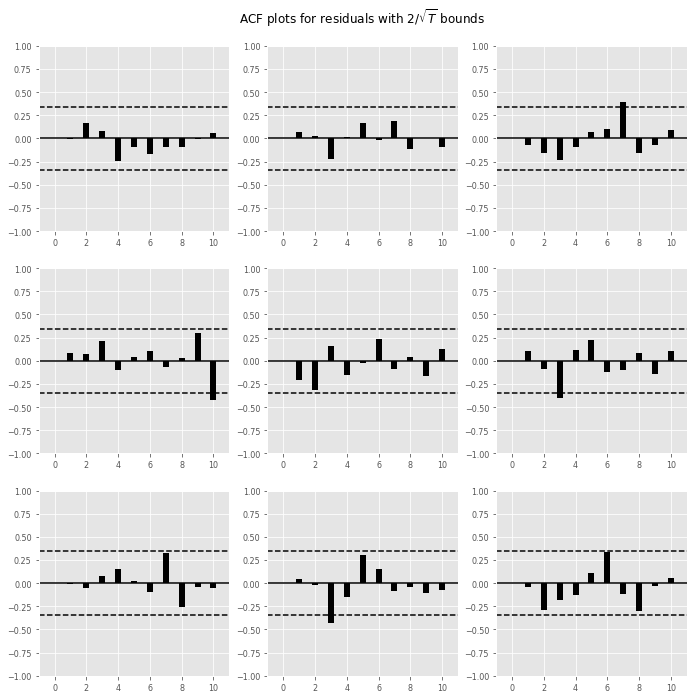

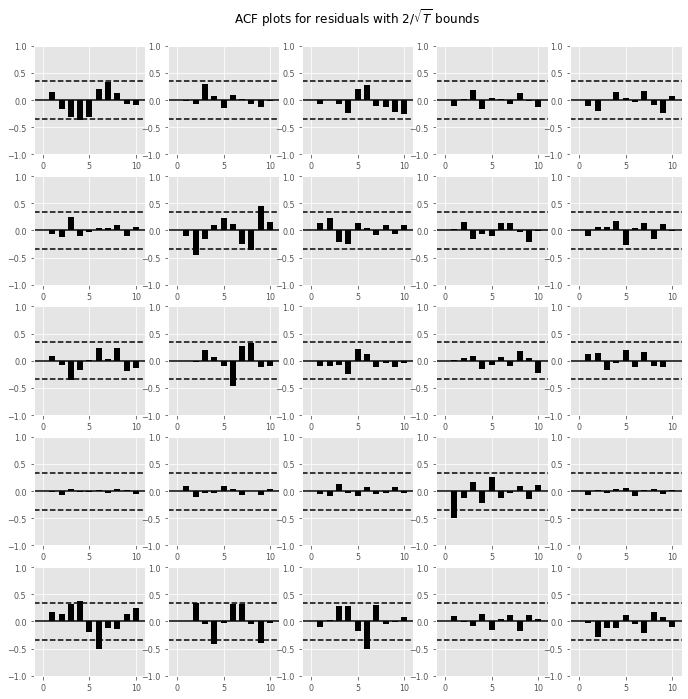

In [26]:
# for m in method:
#   for con in country:
#     model_manu[(con,m)].plot_acorr(nlags=10, resid=True, linewidth=6)
#     model_ser[(con,m)].plot_acorr(nlags=10, resid=True, linewidth=6)
#     plt.show()
# can be used as reference for all residual checking
model_manu[('IND','Rolling statistics')].plot_acorr(nlags=10, resid=True, linewidth=6)
model_ser[('IND','Rolling statistics')].plot_acorr(nlags=10, resid=True, linewidth=6)
plt.show()

#### Validation

In [65]:
forecast = model_manu[(con,m)].forecast(train_manu[(con,m)].values, steps = len(valid_manu[(con,m)]))
t= model_manu[(con,m)].forecast_interval(train_manu[(con,m)].values, steps = len(valid_manu[(con,m)]),alpha = 0.05)
t[0]

array([[-2.12207899e-01, -1.32980899e-01, -8.02590683e+02,
         1.32397101e+06, -1.06559620e-01],
       [ 3.02694307e-01,  6.32921779e-01,  1.94554667e+03,
         8.58086984e+05,  2.61870010e-01],
       [-1.08130279e-01, -8.36876946e-02, -1.97235382e+03,
        -1.08278754e+06, -7.70616706e-02],
       [-5.62961451e-04,  3.08916590e-01,  5.58727544e+02,
         4.01699972e+05, -3.71144468e-02],
       [-5.85259759e-02, -9.51027419e-03, -1.57367234e+02,
         2.07465735e+05, -2.09753975e-02]])

In [66]:
forecast_manu = {}
forecast_ser = {}
def forecast_var(model, train,valid,con, manu):
  forecast = model.forecast_interval(train.values, steps = len(valid),alpha = 0.05)
  manu[(con,m)] = pd.DataFrame(data = forecast[0],columns = train.columns,index = valid.index)
  
for m in method:
  for con in country:
    if len(train_manu[(con,m)].columns) > 1:
      forecast_var(model_manu[(con,m)],train_manu[(con,m)], valid_manu[(con,m)],con, forecast_manu)
    if len(train_ser[(con,m)].columns) > 1:
      forecast_var(model_ser[(con,m)],train_ser[(con,m)], valid_ser[(con,m)],con, forecast_ser)

In [67]:
forecast_manu[('AUS',method[0])]

,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_labor_rate,Population_density,Foreign_direct_investment,Air_freight_million_ton_km,Railways_goods_trans_million_ton-km,New_business_density,Manufacturing_value added_%_of_GDP
Year,,,,,,,,,,
2017,-0.180521,-0.400448,-11.206867,-0.037962,0.011356,-4.362676,107.615556,-5396.722552,-0.340091,-0.472345
2018,-0.337570,0.452356,17.586360,0.030610,0.009748,0.724169,-339.510415,1103.867430,-0.059887,-0.315691
2019,0.356181,-0.335061,-3.936302,-0.033234,-0.007828,2.790905,-103.096193,3405.542639,0.525958,-0.133820
2020,-0.334347,0.150175,4.513243,-0.008786,0.003757,-2.910785,-31.757000,9687.691985,-0.156422,0.400822
2021,0.611821,-0.045688,17.131969,-0.017480,0.001966,2.371808,56.600083,-3601.725594,-0.114547,-0.027555


In [30]:
def invert_second_diff(df,test_obs = 5):
  df_ori = df
  for col_name in df_ori:
    df_ori[col_name+"_1d"] = df[col_name].iloc[-test_obs-1] - df[col_name].iloc[-test_obs-2] +df[col_name].cumsum()
    df_ori[col_name+"_forecasted"] = df[col_name].iloc[-test_obs-1] + df[col_name+"_1d"].cumsum()
    df[col_name] = df_ori[[col_name+"_forecasted"]]
  return df

### Evaluation

In [31]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [32]:
m_metrics = {}
s_metrics = {}
for m in method:
  for con in country:
    if len(train_manu[(con,m)].columns) > 1 and 'Manufacturing_value added_%_of_GDP' in valid_manu[(con,m)].columns:
      y = valid_manu[(con,m)]['Manufacturing_value added_%_of_GDP']
      yhat = forecast_manu[(con,m)]['Manufacturing_value added_%_of_GDP']
      mae = mean_absolute_error(y, yhat)
      mape = mean_absolute_percentage_error(y, yhat)
      rmse = sqrt(mean_squared_error(y, yhat))
      eval =  [mae,rmse,mape]
    #print(mae, mse, rmse, con)
      m_metrics[(con,m)] = eval
    elif len(train_manu[(con,m)].columns) == 1:
      print(f'Only contains target variable for service {con} {m}.')
      s_metrics[(con,m)] = [np.nan,np.nan,np.nan]
    else:
      print(f'Target variable for manufaturce {con} {m} is non-stationary.')
      m_metrics[(con,m)] = [np.nan,np.nan,np.nan]

    if  len(train_ser[(con,m)].columns) > 1 and 'Services_value_added_%_of_GDP' in valid_ser[(con,m)].columns:
      y = valid_ser[(con,m)]['Services_value_added_%_of_GDP']
      yhat = forecast_ser[(con,m)]['Services_value_added_%_of_GDP']
      mae = mean_absolute_error(y, yhat)
      mape = mean_absolute_percentage_error(y, yhat)
      rmse = sqrt(mean_squared_error(y, yhat))
      eval = [mae,rmse,mape]
      #print(mae, mse, rmse, con)
      s_metrics[(con,m)] = eval
    elif len(train_ser[(con,m)].columns) == 1:
      print(f'Only contains target variable for service {con} {m}.')
      s_metrics[(con,m)] = [np.nan,np.nan,np.nan]
    else:
      print(f'Target variable for service {con} {m} is non-stationary.')
      s_metrics[(con,m)] = [np.nan,np.nan,np.nan]

Target variable for manufaturce CAN Rolling statistics is non-stationary.
Only contains target variable for service CHN Rolling statistics.
Target variable for service IND Rolling statistics is non-stationary.
Target variable for manufaturce USA Rolling statistics is non-stationary.


In [33]:
m_eval = pd.DataFrame(m_metrics).transpose()
m_eval.columns = ['MAE', 'RMSE','MAPE']

m_eval

,,MAE,RMSE,MAPE
AUS,Rolling statistics,0.256908,0.330925,1.914238
BRA,Rolling statistics,0.468023,0.571377,5.518836
CAN,Rolling statistics,NaN,NaN,NaN
GBR,Rolling statistics,0.246366,0.275320,2.254362
IND,Rolling statistics,0.661215,0.949452,4.263515
JPN,Rolling statistics,0.519680,0.577926,5.282843
SGP,Rolling statistics,1.614142,1.907385,0.914102
USA,Rolling statistics,NaN,NaN,NaN


In [34]:
s_eval = pd.DataFrame(s_metrics).transpose()
s_eval.columns = ['MAE','RMSE','MAPE']
s_eval

,,MAE,RMSE,MAPE
AUS,Rolling statistics,0.888522,0.929230,1.398821e+00
BRA,Rolling statistics,1.228704,1.623441,8.688359e-01
CAN,Rolling statistics,10585.678304,20947.360393,6.543183e+17
CHN,Rolling statistics,8.067074,12.174890,8.994074e+00
GBR,Rolling statistics,1.119406,1.585623,1.159485e+01
IND,Rolling statistics,NaN,NaN,NaN
JPN,Rolling statistics,0.830713,0.996604,3.986354e+00
SGP,Rolling statistics,1.559810,1.822570,1.057285e+00
USA,Rolling statistics,1.840690,2.454091,9.575618e-01


### Special case for manufacture CAN and Service IND

By difference result, we can see that manufacture CAN and Service IND can be stationary with first order difference.

In [49]:
# drop non-stationary
can_manu={}
ind_ser= {}
for m in method:
  can_manu[m] = drop_non_stat(diff_manu[('CAN',m)])
  ind_ser[m] = drop_non_stat(diff_ser[('IND',m)])

Employment_in_industry_male: TRUE
Research_development_expenditure: FALSE
Population_labor_rate: FALSE
Net_trade_in_goods_services: TRUE
Final_consumption: TRUE
Employment_in_industry_%_of_total_employment: TRUE
Manufacturing_value added_%_of_GDP: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: FALSE
Population_labor_rate: TRUE
Employment_in_service_%_of_total_employment: FALSE
Primary_completion_rate: FALSE
Access_finance: TRUE
New_business_density: TRUE
Services_value_added_%_of_GDP: TRUE


In [50]:
train_can= {}
valid_can = {}
train_ind = {}
valid_ind = {}
for m in method:
  if len(can_manu[m].columns) > 1:
    train_can[m], valid_can[m]= split_train_test(can_manu[m])

  if len(ind_ser[m].columns) > 1:
    train_ind[m], valid_ind[m]= split_train_test(ind_ser[m])

In [51]:
# select the order of model
model_can = {}
model_ind = {}
for m in method:
  if len(can_manu[m].columns) > 1:
    model = VAR(endog=train_can[m])
    res = model.fit()
    model_can[m] = res
  if len(ind_ser[m].columns) > 1:
    model = VAR(endog=train_ind[m])
    res = model.fit()
    model_ind[m] = res

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [52]:
forecast_ind = {}
forecast_can = {}
for m in method:
  if len(can_manu[m].columns) > 1:
    forecast_var(model_can[m],train_can[m], valid_can[m],'CAN', forecast_can)
  if len(ind_ser[m].columns) > 1:
    forecast_var(model_ind[m],train_ind[m], valid_ind[m],'IND', forecast_ind)

In [54]:
m_metrics = {}
s_metrics = {}
for m in method:
  if len(can_manu[m].columns) > 1 and 'Manufacturing_value added_%_of_GDP' in valid_can[m].columns:
    y = valid_can[m]['Manufacturing_value added_%_of_GDP']
    yhat = forecast_can[('CAN',m)]['Manufacturing_value added_%_of_GDP']
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y, yhat)
    rmse = sqrt(mean_squared_error(y, yhat))
    eval = [mae,rmse,mape]
      #print(mae, mse, rmse, con)
    m_metrics[('USA',m)] = eval
  elif len(can_manu[m].columns) == 1:
    print(f'Only contains target variable for manufaturce USA {m}.')
    m_metrics[('USA',m)] = [np.nan,np.nan,np.nan]
  else:
    print(f'Target variable for manufaturce USA {m} is non-stationary.')
    m_metrics[('USA',m)] = [np.nan,np.nan,np.nan]

  if len(ind_ser[m].columns) > 1 and 'Services_value_added_%_of_GDP' in valid_ind[m]:
    y = valid_ind[m]['Services_value_added_%_of_GDP']
    yhat = forecast_ind[('IND',m)]['Services_value_added_%_of_GDP']
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y, yhat)
    rmse = sqrt(mean_squared_error(y, yhat))
    eval =  [mae,rmse,mape]
        #print(mae, mse, rmse, con)
    s_metrics[('IND',m)] = eval
  elif len(ind_ser[m].columns) == 1:
    print(f'Only contains target variable for IND service {m}.')
    s_metrics[('IND',m)] = [np.nan,np.nan,np.nan]
  else:
    print(f'Target variable for service IND {m} is non-stationary.')
    s_metrics[('IND',m)] = [np.nan,np.nan,np.nan]

In [57]:
m_eval = pd.DataFrame(m_metrics).transpose()
m_eval.columns = ['MAE','RMSE','MAPE']
m_eval

,,MAE,RMSE,MAPE
USA,Rolling statistics,0.554887,0.882868,0.896549


In [58]:
s_eval = pd.DataFrame(s_metrics).transpose()
s_eval.columns = ['MAE','RMSE','MAPE']
s_eval

,,MAE,RMSE,MAPE
IND,Rolling statistics,1.091,1.250397,2.412351


### Forecasting

In [91]:
def invert_second_diff(df_ori, df,col_name,test_obs = 5):
  df[col_name+"_1d"] = df_ori[col_name].iloc[-test_obs-1] - df_ori[col_name].iloc[-test_obs-2] +df[col_name].cumsum()
  df[col_name+"_forecasted"] = df_ori[col_name].iloc[-test_obs-1] + df[col_name+"_1d"].cumsum()
  return df

In [104]:
for m in method:
  for con in country:
    if con != 'CAN' and con != 'USA' and con != 'CHN':
      invert_second_diff(m_dfs[(con,m)], forecast_manu[(con,m)],'Manufacturing_value added_%_of_GDP')
    if con != 'IND' and con != 'USA':
      invert_second_diff(s_dfs[(con,m)], forecast_ser[(con,m)],'Services_value_added_%_of_GDP')

In [85]:
predict_manu = {}
predict_ser = {}
def predict_var(model, train,con, manu):
  forecast = model.forecast_interval(train.values, steps =5,alpha = 0.05)
  manu[(con,m)] = pd.DataFrame(data = forecast[0],columns = train.columns,index =[2022,2023,2024,2025,2026])
  
for m in method:
  for con in country:
    if len(train_manu[(con,m)].columns) > 1:
      predict_var(model_manu[(con,m)],df_manu[(con,m)], con, predict_manu)
    if len(train_ser[(con,m)].columns) > 1:
      predict_var(model_ser[(con,m)],df_ser[(con,m)],con, predict_ser)

In [105]:
for m in method:
  for con in country:
    if con != 'CAN' and con != 'USA' and con != 'CHN':
      invert_second_diff(m_dfs[(con,m)], predict_manu[(con,m)],'Manufacturing_value added_%_of_GDP')
    if con != 'IND' and con != 'USA':
      invert_second_diff(s_dfs[(con,m)], predict_ser[(con,m)],'Services_value_added_%_of_GDP') 

## Logging results

In [106]:
valid_manu[(con,m)]

,Employment_in_industry_male,High_technology_exports,Air_freight_million_ton_km,Container_port_traffic_TEU,Employment_in_industry_%_of_total_employment
Year,,,,,
2017,-0.020002,-4.182927,2141.938197,3.146345e+06,0.029999
2018,0.290003,2.367760,-1539.884897,-1.052874e+06,0.190002
2019,-0.260002,0.983362,-1880.784763,-1.900960e+06,-0.100002
2020,-1.461462,0.612599,-1218.131066,-1.297726e+06,-1.570552
2021,1.197935,-1.501063,0.348622,3.743481e-01,1.261848


In [125]:
def log_res(con, m,raw,valid, train, pred, forecast,task,y):
  logs = {}
  logs['y_fitted_on_begin_2016'] = pd.DataFrame(
      {'Year': train[(con,m)].index,
        'y_value': train[(con,m)][y], 
        'y_lower_bound': None,
        'y_upper_bound': None}
  )
  logs['y_pred_on_2017_2021'] = pd.DataFrame(
      {'Year': valid[(con,m)].index,
        'y_value':pred[(con,m)][y], 
        'y_lower_bound': None,
        'y_upper_bound': None}
  )

  logs['y_fitted_on_begin_2021'] = pd.DataFrame(
      {'Year': raw[(con,m)].index,
        'y_value': raw[(con,m)][y], 
        'y_lower_bound': None,
        'y_upper_bound': None}
  )
  logs['y_pred_on_2022_2026'] = pd.DataFrame(
      {'Year':[2022,2023,2024,2025,2026],
      'y_value': forecast[(con,m)][y], 
      'y_lower_bound': None,
      'y_upper_bound': None}
  )        
  with pd.ExcelWriter(f"VAR/{task}/{con}.xlsx") as writer:  
    for log_type, log in logs.items():
        log.to_excel(writer, sheet_name=log_type, index=False)
        
for con in country:
  for m in method:
    if con == 'CAN':
      continue
    if con == 'CHN' or con == 'USA':
      log_res(con, m,s_dfs,valid_ser, train_ser, forecast_ser,
        predict_ser, 'Service', "Services_value_added_%_of_GDP")
      continue
    if con == 'IND':
      log_res(con, m, m_dfs,valid_manu, train_manu, forecast_manu,
        predict_manu, 'Manufacturing', "Manufacturing_value added_%_of_GDP")
      continue
    log_res(con, m, m_dfs,valid_manu, train_manu, forecast_manu,
        predict_manu, 'Manufacturing', "Manufacturing_value added_%_of_GDP")
    log_res(con, m,s_dfs,valid_ser, train_ser, forecast_ser,
        predict_ser, 'Service', "Services_value_added_%_of_GDP")